import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [2]:
#selected subset of dates. 
val_dates = ['180328','180329']
test_dates = ['180330','180331']

CH = 23
train_loader, val_loader, test_loader = create_dataloaders(val_dates=val_dates, test_dates=test_dates, batch_size=128, version='_Goose_1st_5s_1', CH=CH, upsample=True)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(535, 47, 109)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 5])
torch.Size([128, 1])
128
128
128


date:180327, rec:005, time:5645.0


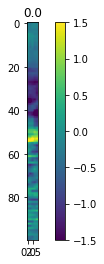

date:180324, rec:008, time:2680.0


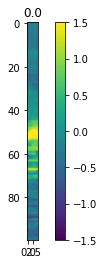

date:180324, rec:008, time:3760.0


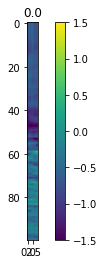

date:180325, rec:009, time:3838.0


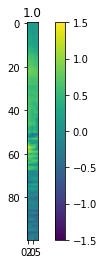

date:180325, rec:009, time:5472.0


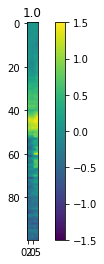

date:180401, rec:003, time:17.0


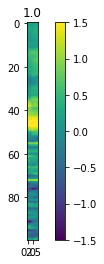

date:180324, rec:006, time:4687.0


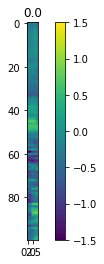

date:180324, rec:009, time:1280.0


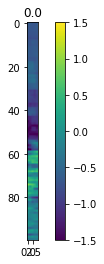

date:180401, rec:001, time:1272.0


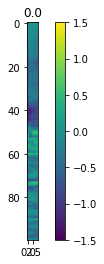

date:180401, rec:001, time:1507.0


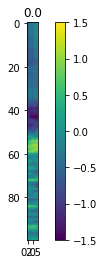

date:180327, rec:008, time:6421.0


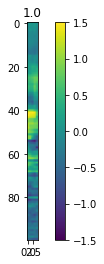

date:180327, rec:008, time:3524.0


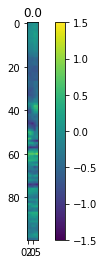

date:180327, rec:007, time:6218.0


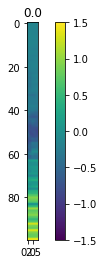

date:180324, rec:008, time:47.0


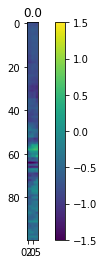

date:180325, rec:001, time:3532.0


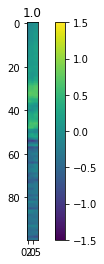

date:180324, rec:008, time:1138.0


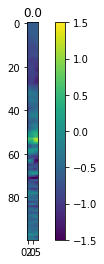

date:180325, rec:006, time:5465.0


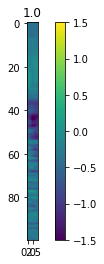

date:180325, rec:001, time:1532.0


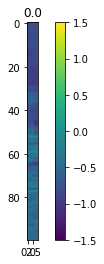

date:180322, rec:003, time:2510.0


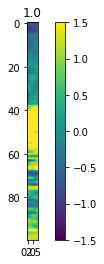

date:180325, rec:009, time:2267.0


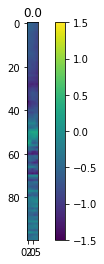

date:180327, rec:002, time:4190.0


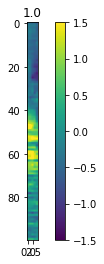

date:180326, rec:004, time:6529.0


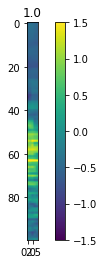

date:180327, rec:008, time:6346.0


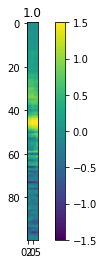

date:180325, rec:003, time:2242.0


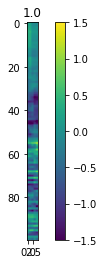

date:180325, rec:004, time:4182.0


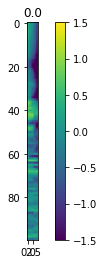

date:180327, rec:007, time:6418.0


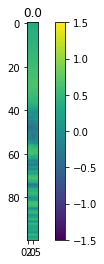

date:180325, rec:009, time:4521.0


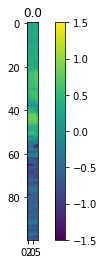

date:180325, rec:009, time:1157.0


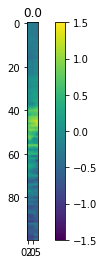

date:180325, rec:007, time:522.0


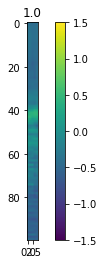

date:180327, rec:008, time:2134.0


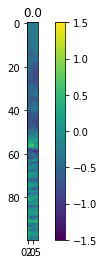

date:180327, rec:005, time:6802.0


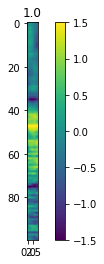

date:180327, rec:007, time:1892.0


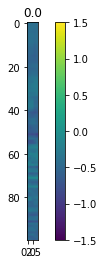

date:180325, rec:007, time:3018.0


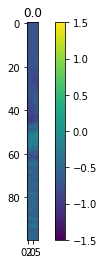

date:180325, rec:007, time:5945.0


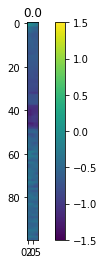

date:180323, rec:004, time:5006.0


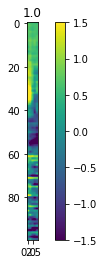

date:180327, rec:007, time:6918.0


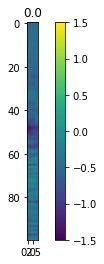

date:180323, rec:007, time:2957.0


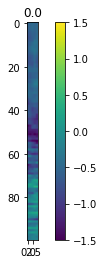

date:180327, rec:007, time:5898.0


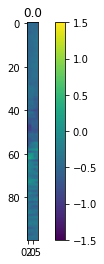

date:180327, rec:006, time:4960.0


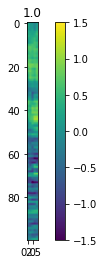

date:180327, rec:002, time:3848.0


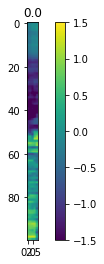

date:180327, rec:007, time:221.0


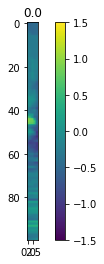

date:180325, rec:007, time:3303.0


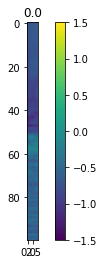

date:180325, rec:003, time:3119.0


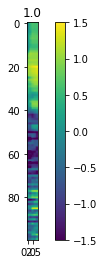

date:180327, rec:006, time:4810.0


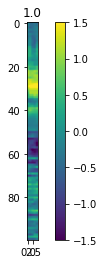

date:180325, rec:007, time:2603.0


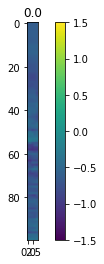

date:180327, rec:002, time:5216.0


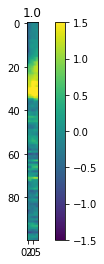

date:180325, rec:002, time:5917.0


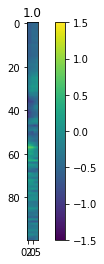

date:180401, rec:001, time:187.0


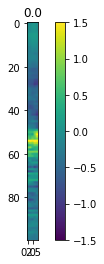

date:180324, rec:008, time:5216.0


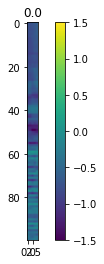

date:180325, rec:003, time:5874.0


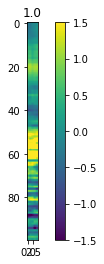

date:180325, rec:001, time:1897.0


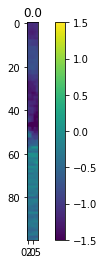

date:180322, rec:007, time:3336.0


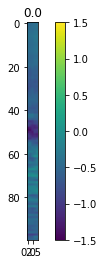

date:180325, rec:007, time:2948.0


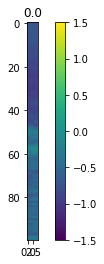

date:180325, rec:001, time:1887.0


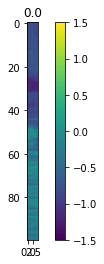

date:180323, rec:001, time:1312.0


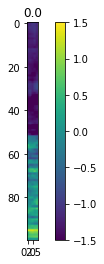

date:180324, rec:006, time:759.0


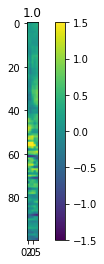

date:180325, rec:006, time:2519.0


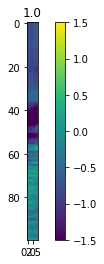

date:180327, rec:001, time:6237.0


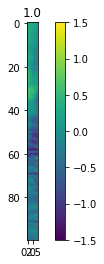

date:180325, rec:004, time:2877.0


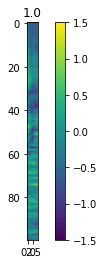

date:180322, rec:004, time:5774.0


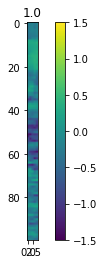

date:180325, rec:009, time:352.0


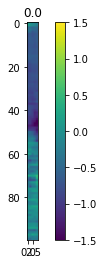

date:180325, rec:005, time:3626.0


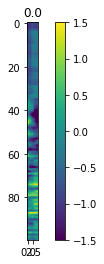

date:180325, rec:006, time:7034.0


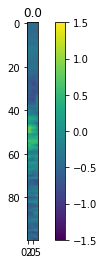

date:180327, rec:005, time:2165.0


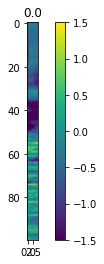

date:180324, rec:001, time:7174.0


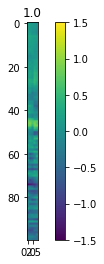

date:180327, rec:007, time:4778.0


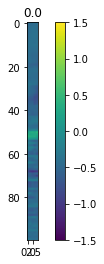

date:180322, rec:003, time:5617.0


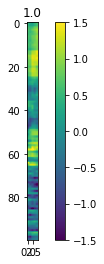

date:180327, rec:007, time:5208.0


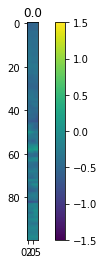

date:180323, rec:004, time:6588.0


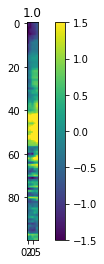

date:180324, rec:005, time:2047.0


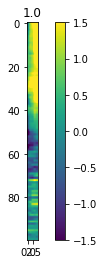

date:180324, rec:008, time:5406.0


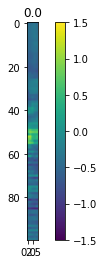

date:180327, rec:004, time:3427.0


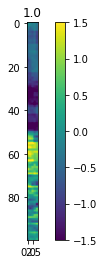

date:180325, rec:004, time:4437.0


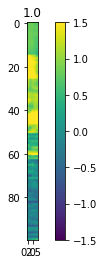

date:180324, rec:006, time:2143.0


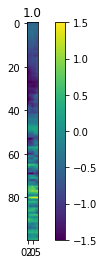

date:180401, rec:001, time:657.0


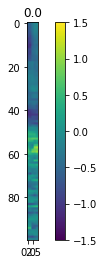

date:180327, rec:001, time:2027.0


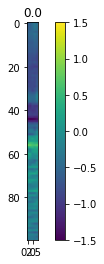

date:180323, rec:003, time:2833.0


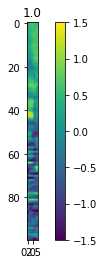

date:180327, rec:007, time:4227.0


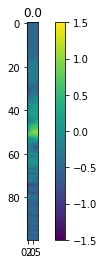

date:180325, rec:001, time:3777.0


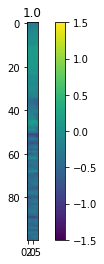

date:180323, rec:005, time:4438.0


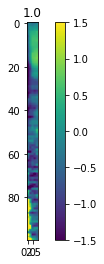

date:180325, rec:004, time:6524.0


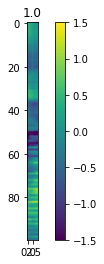

date:180327, rec:004, time:5081.0


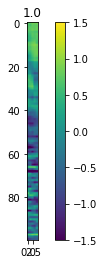

date:180324, rec:009, time:1195.0


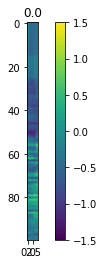

date:180325, rec:006, time:3220.0


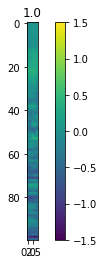

date:180324, rec:008, time:3385.0


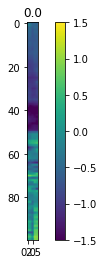

date:180322, rec:003, time:6628.0


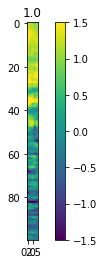

date:180324, rec:009, time:12.0


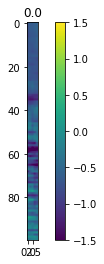

date:180325, rec:007, time:1506.0


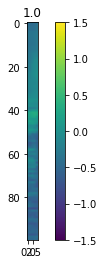

date:180324, rec:008, time:3740.0


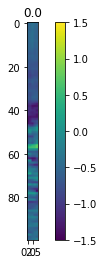

date:180401, rec:003, time:382.0


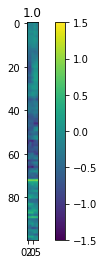

date:180327, rec:008, time:5060.0


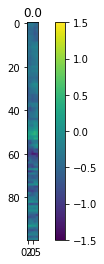

date:180327, rec:008, time:1729.0


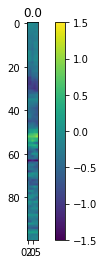

date:180325, rec:003, time:4849.0


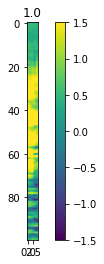

date:180324, rec:004, time:2136.0


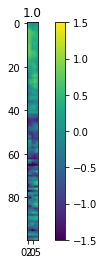

date:180323, rec:004, time:6513.0


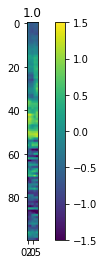

date:180327, rec:001, time:2492.0


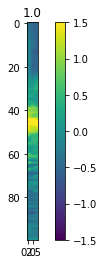

date:180322, rec:004, time:6493.0


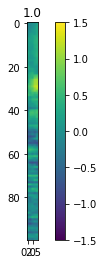

date:180324, rec:001, time:3262.0


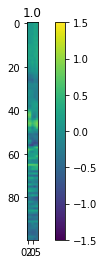

date:180323, rec:007, time:6523.0


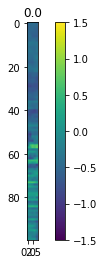

date:180324, rec:004, time:2969.0


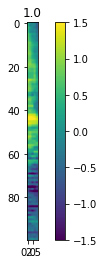

date:180327, rec:001, time:5977.0


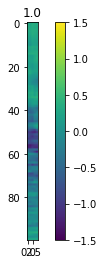

date:180324, rec:001, time:5709.0


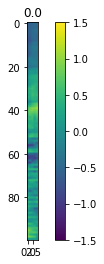

date:180325, rec:005, time:631.0


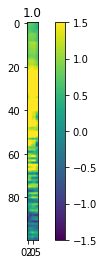

date:180323, rec:002, time:6138.0


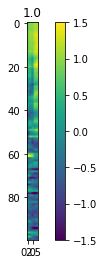

date:180324, rec:004, time:4726.0


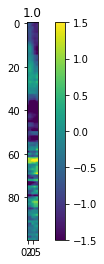

date:180327, rec:007, time:5423.0


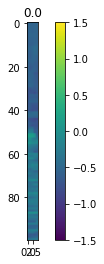

date:180325, rec:007, time:7000.0


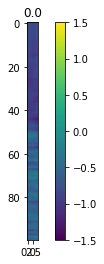

date:180401, rec:003, time:1037.0


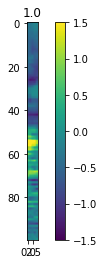

date:180322, rec:007, time:4117.0


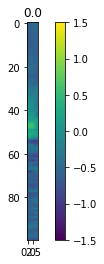

date:180323, rec:004, time:3645.0


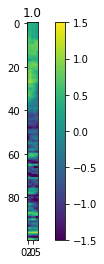

date:180324, rec:008, time:6606.0


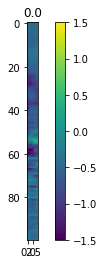

date:180326, rec:003, time:7142.0


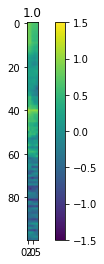

date:180325, rec:005, time:6846.0


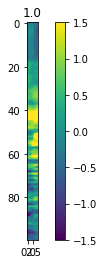

date:180327, rec:001, time:2062.0


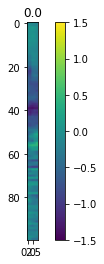

date:180325, rec:005, time:3313.0


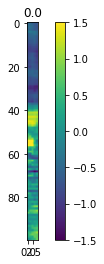

date:180325, rec:001, time:5093.0


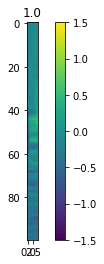

date:180324, rec:009, time:837.0


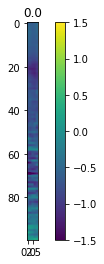

date:180325, rec:003, time:1872.0


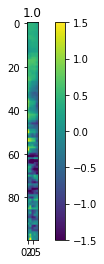

date:180324, rec:006, time:1738.0


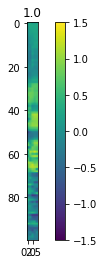

date:180324, rec:008, time:5791.0


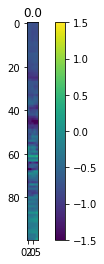

date:180323, rec:002, time:1989.0


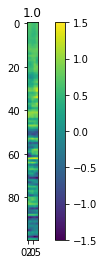

date:180327, rec:005, time:6579.0


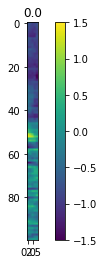

date:180323, rec:002, time:442.0


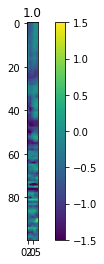

date:180324, rec:004, time:6960.0


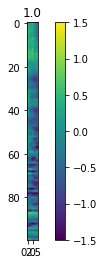

date:180327, rec:007, time:3252.0


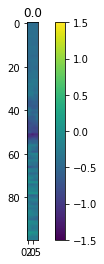

date:180401, rec:002, time:3078.0


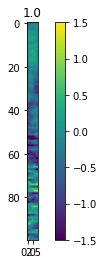

date:180324, rec:008, time:1383.0


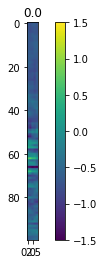

date:180322, rec:007, time:4977.0


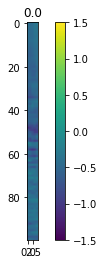

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 5
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [11]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5217738747596741
Val loss for epoch 0: 0.6020777225494385
Train loss for epoch 1: 0.5105658769607544
Val loss for epoch 1: 0.580763578414917
1
Train loss for epoch 2: 0.5090957880020142
Val loss for epoch 2: 0.5816871523857117
Train loss for epoch 3: 0.50808185338974
Val loss for epoch 3: 0.5776739120483398
3
Train loss for epoch 4: 0.5067845582962036
Val loss for epoch 4: 0.568287193775177
4
Train loss for epoch 5: 0.5069540143013
Val loss for epoch 5: 0.6001090407371521
Train loss for epoch 6: 0.5061887502670288
Val loss for epoch 6: 0.5732025504112244
Train loss for epoch 7: 0.5057023763656616
Val loss for epoch 7: 0.5851699709892273
Train loss for epoch 8: 0.5053945183753967
Val loss for epoch 8: 0.5526946187019348
8
Train loss for epoch 9: 0.5043773651123047
Val loss for epoch 9: 0.5637338757514954
Train loss for epoch 10: 0.5044357180595398
Val loss for epoch 10: 0.5672174096107483
Train loss for epoch 11: 0.5044915676116943
Val loss for epoch 11: 0.5449

KeyboardInterrupt: 

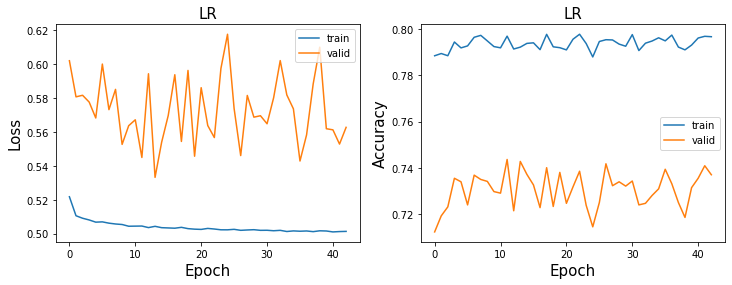

In [12]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [5]:
# best_epoch = 14

In [13]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [14]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.6368054747581482 accuracy:0.6867652362062748


In [15]:
np.mean(np.concatenate(test_labels))

0.73472774

In [16]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

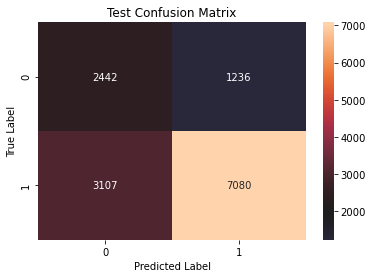

In [17]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [18]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180331, rec:001, time:3276.0, label:1.0
Original data 62 CH


### Logistic regression with L2 regularization

In [3]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
timewindow = 5
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

model = GLM(input_dim=1*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

NameError: name 'torch' is not defined

In [2]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

NameError: name 'num_epochs' is not defined

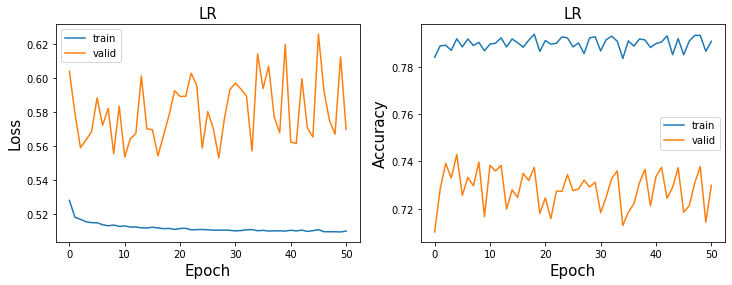

In [8]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [5]:
# best_epoch = 14

In [9]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [10]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.6432279348373413 accuracy:0.6774612333213127


In [11]:
np.mean(np.concatenate(test_labels))

0.73472774

In [12]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

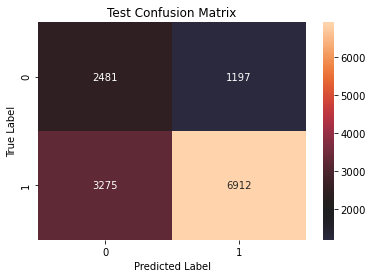

In [13]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [14]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180331, rec:001, time:3276.0, label:1.0
Original data 62 CH


### Logistic Regression with finite difference regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 5
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5291414856910706
Val loss for epoch 0: 0.6009805202484131
Train loss for epoch 1: 0.5190419554710388
Val loss for epoch 1: 0.594042956829071
1
Train loss for epoch 2: 0.5172408819198608
Val loss for epoch 2: 0.5707386136054993
2
Train loss for epoch 3: 0.5162443518638611
Val loss for epoch 3: 0.5635892152786255
3
Train loss for epoch 4: 0.5156021118164062
Val loss for epoch 4: 0.5900914669036865
Train loss for epoch 5: 0.5151940584182739
Val loss for epoch 5: 0.5834949016571045
Train loss for epoch 6: 0.5146167874336243
Val loss for epoch 6: 0.593264102935791
Train loss for epoch 7: 0.5149444341659546
Val loss for epoch 7: 0.5657881498336792
Train loss for epoch 8: 0.5143728256225586
Val loss for epoch 8: 0.5843404531478882
Train loss for epoch 9: 0.5138208270072937
Val loss for epoch 9: 0.6051498651504517
Train loss for epoch 10: 0.5141477584838867
Val loss for epoch 10: 0.5643901228904724
Train loss for epoch 11: 0.5141230821609497
Val loss for epoch 11: 0.5

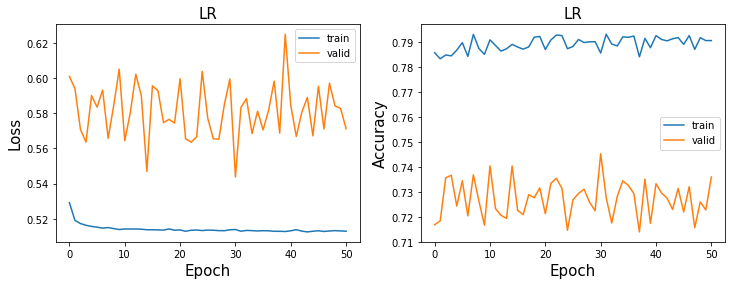

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [5]:
# best_epoch = 14

In [18]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [19]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.6693254709243774 accuracy:0.6688063469166967


In [20]:
np.mean(np.concatenate(test_labels))

0.73472774

In [21]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

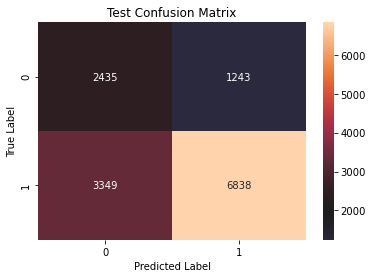

In [22]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [23]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180330, rec:001, time:5977.0, label:1.0
Original data 62 CH


Done here. Not done w SVM. 

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

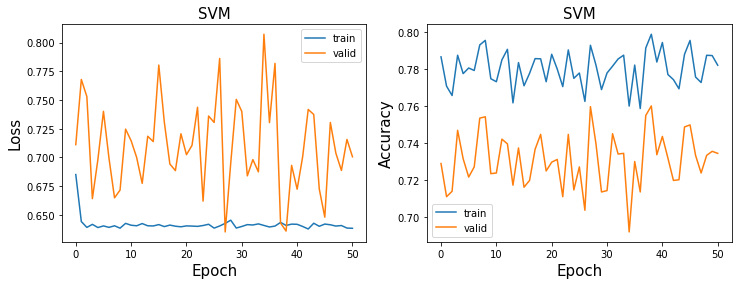

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

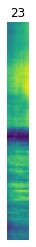

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


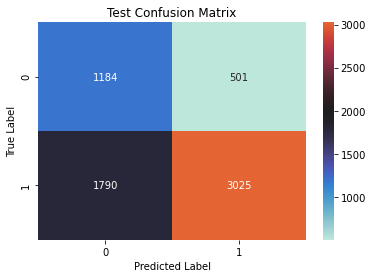

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


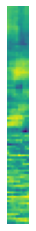

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

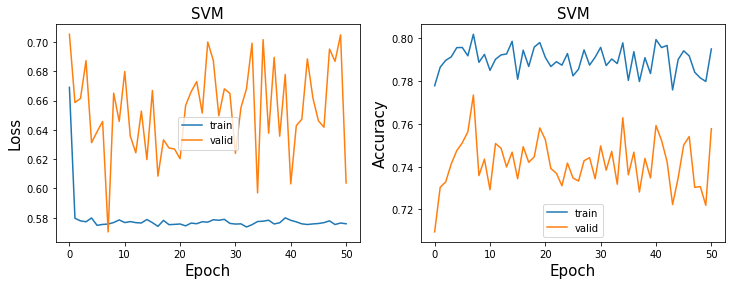

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

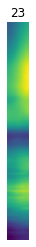

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


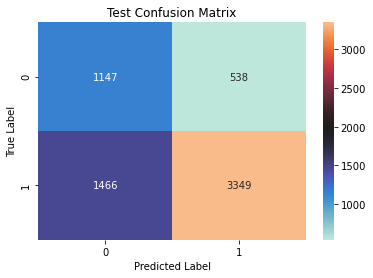

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


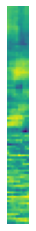

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()